# SVM Kernels Indepth Intution and Practical Explanation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Blue circle
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt((10**2 - x**2))
y = np.hstack([y, -y])
x = np.hstack([x, -x])

In [2]:
# Orange Circle
x1 = np.linspace(-5, 5, 100)
y1 = np.sqrt((5**2 - x1**2))
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

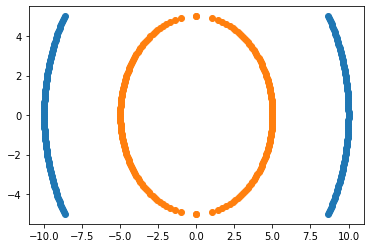

In [4]:
plt.scatter(y, x)
plt.scatter(y1, x1)
plt.show()

In [15]:
import pandas as pd

df1 = pd.DataFrame(np.vstack([y, x]).T, columns=['X1', 'X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1', 'X2'])
df2['Y'] = 1
df = pd.concat((df1, df2))
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [16]:
# splitting the dataset into train test
from sklearn.model_selection import train_test_split as tts
x_train, x_text, y_train, y_test = tts(df.drop(columns=['Y']), df['Y'], random_state=1, test_size=0.25)

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifer = SVC(kernel='linear')
classifer.fit(X=x_train, y=y_train)
y_pred = classifer.predict(x_text)
accuracy_score(y_test, y_pred)

0.42

In [20]:
df['X1_sqr'] = df.X1 ** 2
df['X2_sqr'] = df.X2 ** 2
df['X1X2'] = df.X1 * df.X2

In [21]:
df.head()

,X1,X2,Y,X1_sqr,X2_sqr,X1X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [22]:
import plotly.express as px
fig = px.scatter_3d(
    data_frame=df,
    x = 'X1',
    y = 'X2',
    z = 'X1X2',
    color = 'Y'
)
fig.show()

In [23]:
import plotly.express as px
fig = px.scatter_3d(
    data_frame=df,
    x = 'X1_sqr',
    y = 'X2',
    z = 'X1X2',
    color = 'Y'
)
fig.show()

In [24]:
import plotly.express as px
fig = px.scatter_3d(
    data_frame=df,
    x = 'X1',
    y = 'X2_sqr',
    z = 'X1X2',
    color = 'Y'
)
fig.show()

In [25]:
import plotly.express as px
fig = px.scatter_3d(
    data_frame=df,
    x = 'X1_sqr',
    y = 'X2_sqr',
    z = 'X1X2',
    color = 'Y'
)
fig.show()